# **Global Job Market Analysis**

---



# **1) Project Goal**
The goal of this project is to analyze job market trends in the year 2023, providing valuable insights into the evolving demand for roles, skills, and locations. The project aims to:

🔖 **Job Title Distribution:**

Count and visualize the frequency of different job titles

🌍 **Geographical Analysis:**

Compare job density in Top10 location and create a map of job concentrations by country/region

🏡 **Remote work patterns:**

Calculate the percentage of remote vs. on-site positions

🔧 **Skill Analysis:**

Extract and count the Top 10 skills across all positions

🕒 **Time series Analysis:**

Analyze posting frequency by month/quarter

🔑 **Benefits and Requirement Analysis:**

Calculate percentage of positions mentioning no degree requirements


By analyzing job market trends, remote work patterns, skill demands, and geographical distribution, the project delivers data-driven recommendations to enhance recruitment strategies and improve market positioning.

# **2) Overview of the dataset**

This dataset contains job postings for data-related roles across various locations, companies, and job requirements. Key attributes include job titles, locations, job platforms, work schedule types, work-from-home availability, required skills, company names, and posted dates. It also highlights whether a degree is required, and geographical information. This data is ideal for analyzing trends in job titles, skills demand, geographical distribution, and remote work patterns offered by companies.

In [1]:
import os
print(os.getcwd())

/content


# **3) Import required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **4) Creating DataFrames**

In [3]:
df = pd.read_csv("/content/data_jobs.csv", engine='python')

# **5) Exploratory Data Analysis**

## **5.2) Data Inspection**

In [4]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df.shape

(785741, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [7]:
df.describe()

,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [8]:
# unique job_posted_date data
df['job_posted_date'].unique()

array(['2023-06-16 13:44:15', '2023-01-14 13:18:07',
       '2023-10-10 13:14:55', ..., '2023-03-12 06:32:17',
       '2023-03-12 06:31:13', '2023-03-12 06:32:36'], dtype=object)

## **5.3) Data Preparation**

### **5.3.1) Changing datatypes**

In [9]:
# Change the datatype of job_posted_date to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

### **5.3.2) Delete unnecessary columns**

In [10]:
# Delete the columns - job_title, salary_rate, salary_year_avg, salary_hour_avg, job_type_skills
df.drop(['job_title', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'job_type_skills'], axis=1, inplace=True)

### **5.3.3) Handling null values**

In [11]:
df.isnull().sum()

,0
job_title_short,0
job_location,1045
job_via,8
job_schedule_type,12667
job_work_from_home,0
search_location,0
job_posted_date,0
job_no_degree_mention,0
job_health_insurance,0
job_country,49


In [12]:
# In what areas the job skills are missing the most? What are these positions?
missing_skills_df = df[df['job_skills'].isnull()]
missing_skills_df

,job_title_short,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills
0,Senior Data Engineer,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,Boehringer Ingelheim,NaN
21,Data Scientist,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,Credit Agricole,NaN
26,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,Infinite Computer Solutions,NaN
29,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,Exusia,NaN
36,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,Assuredpartners,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
785713,Cloud Engineer,"Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,Amazon Web Services (AWS),NaN
785715,Data Analyst,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,Amul,NaN
785718,Business Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,Diebold Nixdorf,NaN
785724,Data Engineer,"Koln, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,Target Reply,NaN


In [13]:
# Count the number of missing skill entries per job title
missing_skills_by_title = missing_skills_df['job_title_short'].value_counts().reset_index()
missing_skills_by_title

,job_title_short,count
0,Data Analyst,36681
1,Data Scientist,26479
2,Data Engineer,16879
3,Business Analyst,12308
4,Software Engineer,7261
5,Senior Data Scientist,4881
6,Senior Data Analyst,4346
7,Cloud Engineer,3362
8,Senior Data Engineer,2931
9,Machine Learning Engineer,1909


In [14]:
# Count the number of missing skill entries per job location
missing_skills_by_location = missing_skills_df['job_location'].value_counts().reset_index()
missing_skills_by_location


,job_location,count
0,Anywhere,5702
1,Singapore,2843
2,"Paris, France",1821
3,Dubai - United Arab Emirates,1349
4,"Madrid, Spain",1330
...,...,...
7818,Estonia (+1 other),1
7819,"Vacarisses, Spain",1
7820,"Riudellots de la Selva, Spain",1
7821,"Lardy, France",1


/tmp/ipython-input-15-2781535839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_skills_by_title.head(10), x='count', y='job_title_short', palette='viridis')


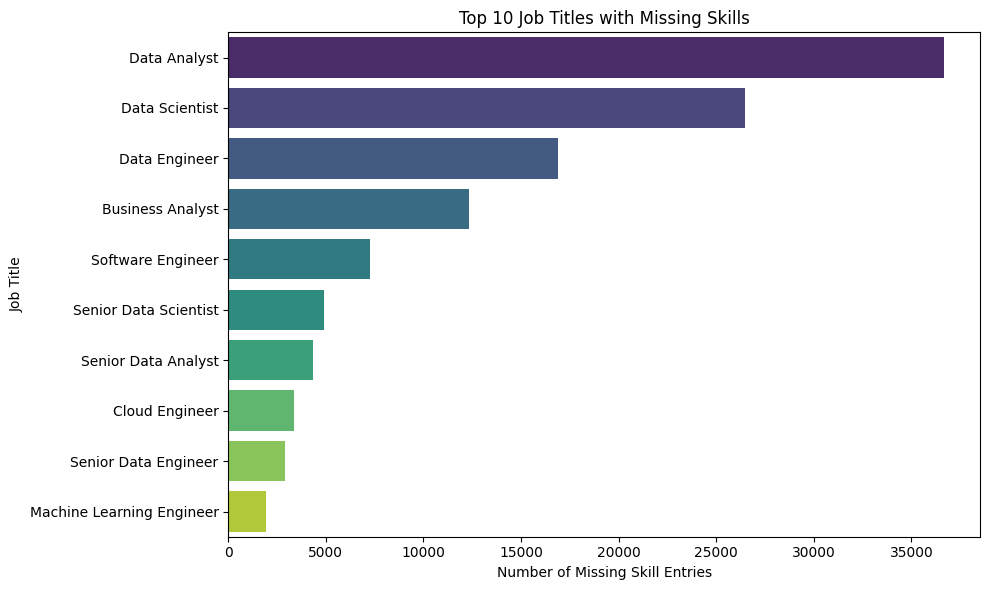

In [15]:
# Bar plot for job titles with missing skills
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_skills_by_title.head(10), x='count', y='job_title_short', palette='viridis')
plt.title('Top 10 Job Titles with Missing Skills')
plt.xlabel('Number of Missing Skill Entries')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-604547174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_skills_by_location.head(10), x='count', y='job_location', palette='magma')


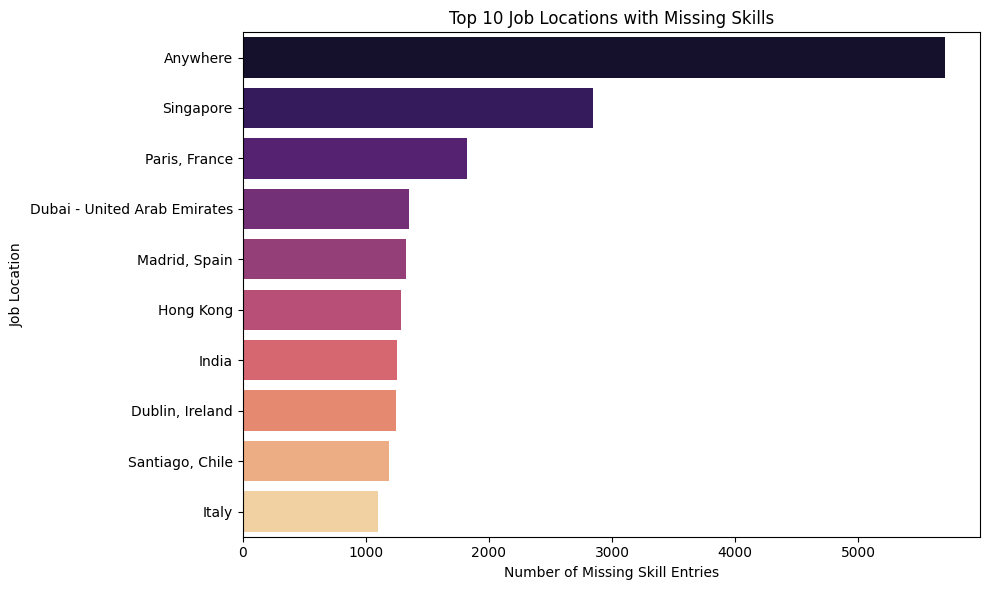

In [16]:
# Bar plot for job locations with missing skills
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_skills_by_location.head(10), x='count', y='job_location', palette='magma')
plt.title('Top 10 Job Locations with Missing Skills')
plt.xlabel('Number of Missing Skill Entries')
plt.ylabel('Job Location')
plt.tight_layout()
plt.show()


In [17]:
# Fill null values with 'Unknown' for the remaining columns
df.fillna({
    'job_location': 'Unknown',
    'job_via': 'Unknown',
    'job_schedule_type': 'Unknown',
    'job_skills': 'Not specified',
    'job_country': 'Unknown',
    'company_name': 'Unknown'
}, inplace=True)

In [18]:
df.isnull().sum()

,0
job_title_short,0
job_location,0
job_via,0
job_schedule_type,0
job_work_from_home,0
search_location,0
job_posted_date,0
job_no_degree_mention,0
job_health_insurance,0
job_country,0


### **5.3.4) Checking duplicate values**

In [19]:
df.duplicated().sum()

np.int64(629)

In [20]:
df.head()

,job_title_short,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills
0,Senior Data Engineer,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,Boehringer Ingelheim,Not specified
1,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',..."


**No Duplicates**

In [ ]:
# Download the dataframe into csv format
df.to_csv("cleaned_data_jobs.csv", index=False)

# **6) Data Analysis**

In [21]:
# Identify how many unique job titles exists
df['job_title_short'].nunique()

10

## **6.1) Job Title Distribution Analysis**

In [22]:
# Calculate the number of job posting for each title
job_title_analysis = df['job_title_short'].value_counts().reset_index()
job_title_analysis.columns = ['job_title_short', '# Job Postings']
job_title_analysis

,job_title_short,# Job Postings
0,Data Analyst,196075
1,Data Engineer,186241
2,Data Scientist,172286
3,Business Analyst,49063
4,Software Engineer,44929
5,Senior Data Engineer,44563
6,Senior Data Scientist,36957
7,Senior Data Analyst,29216
8,Machine Learning Engineer,14080
9,Cloud Engineer,12331


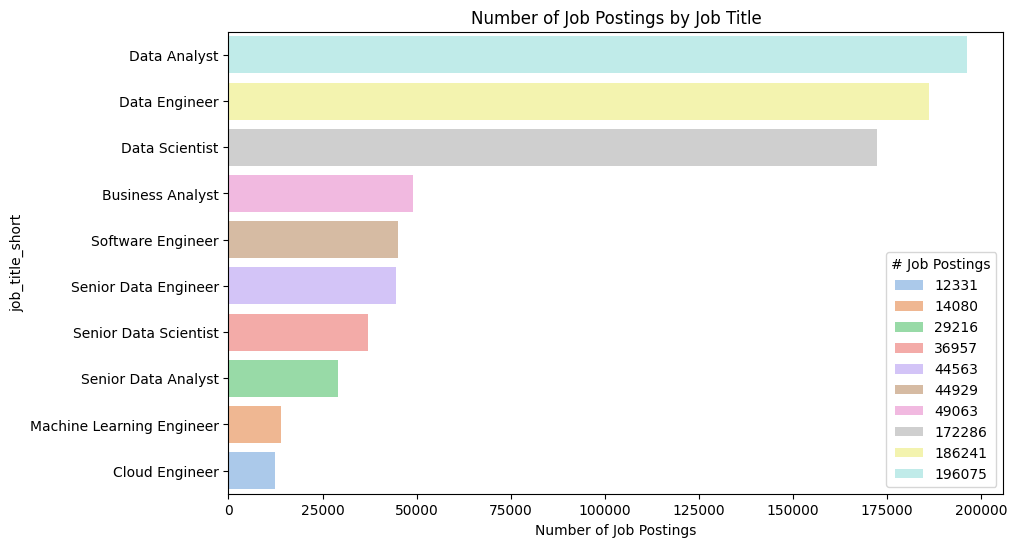

In [23]:
# Create a graph for job_counts
plt.figure(figsize=(10, 6))
sns.barplot(x='# Job Postings', y='job_title_short', hue = '# Job Postings', data=job_title_analysis, palette = 'pastel')
plt.title('Number of Job Postings by Job Title')
plt.xlabel('Number of Job Postings')
plt.show()

## **6.2) Geographical Analysis**

In [24]:
# Compare job density in top 10 locations
job_location_analysis = df['job_location'].value_counts().head(10).reset_index()
job_location_analysis

,job_location,count
0,Anywhere,69552
1,Singapore,23415
2,"Paris, France",12311
3,"Bengaluru, Karnataka, India",11474
4,"London, UK",10564
5,"Madrid, Spain",9787
6,"New York, NY",8165
7,India,7660
8,United States,7454
9,Hong Kong,7341


In [25]:
# Compare job density job country
job_country_analysis = df['job_country'].value_counts().reset_index()
job_country_analysis

,job_country,count
0,United States,206292
1,India,51088
2,United Kingdom,40375
3,France,39922
4,Germany,27694
...,...,...
156,Guinea,4
157,Lesotho,3
158,Mauritania,3
159,Bhutan,3


In [26]:
# Create a choropleth map
import plotly.express as px
fig = px.choropleth(job_location_analysis, locations='job_location', locationmode='country names', color='count', hover_name='job_location', title='Job Density by Location')
fig.show()

In [27]:
# Any distribution by top places by job_short_title?
job_location_analysis_by_title = df.groupby(['job_location', 'job_title_short']).size().reset_index(name='count')
job_location_analysis_by_title.sort_values(by='count', ascending=False, inplace=True)
job_location_analysis_by_title.head()

,job_location,job_title_short,count
1571,Anywhere,Data Engineer,21211
1572,Anywhere,Data Scientist,14535
1570,Anywhere,Data Analyst,13326
34853,Singapore,Data Analyst,6573
1575,Anywhere,Senior Data Engineer,6559


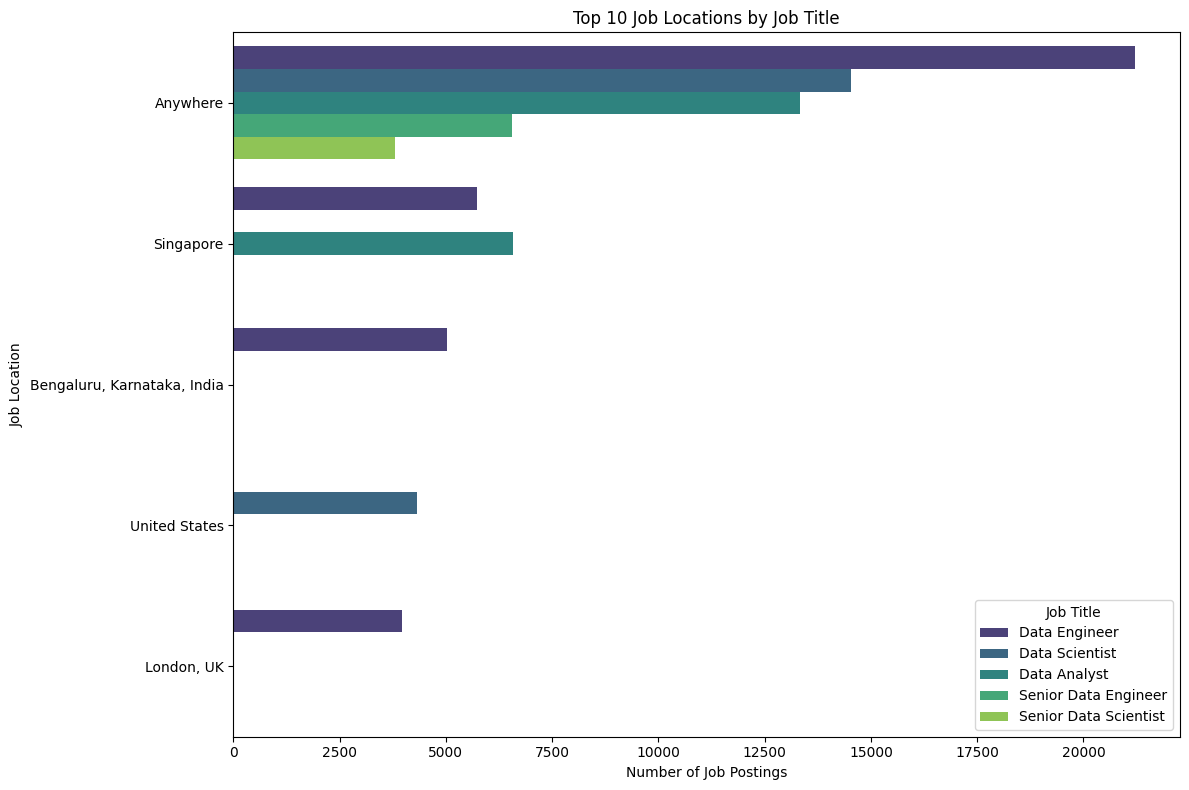

In [28]:
# Plot a graph
plt.figure(figsize=(12, 8))
sns.barplot(data=job_location_analysis_by_title.head(10), x='count', y='job_location', hue='job_title_short', palette='viridis')
plt.title('Top 10 Job Locations by Job Title')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Location')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()


## **6.3) Remote work pattern Analysis**

In [29]:
# Calculate the percentage of remote vs. on-site positions
remote_analysis = df['job_work_from_home'].value_counts(normalize=True).reset_index()
remote_analysis

,job_work_from_home,proportion
0,False,0.911482
1,True,0.088518


In [30]:
# Get unique job_location where job_work_from_home is true
df[df['job_work_from_home'] == True]['job_location'].unique()

array(['Anywhere'], dtype=object)

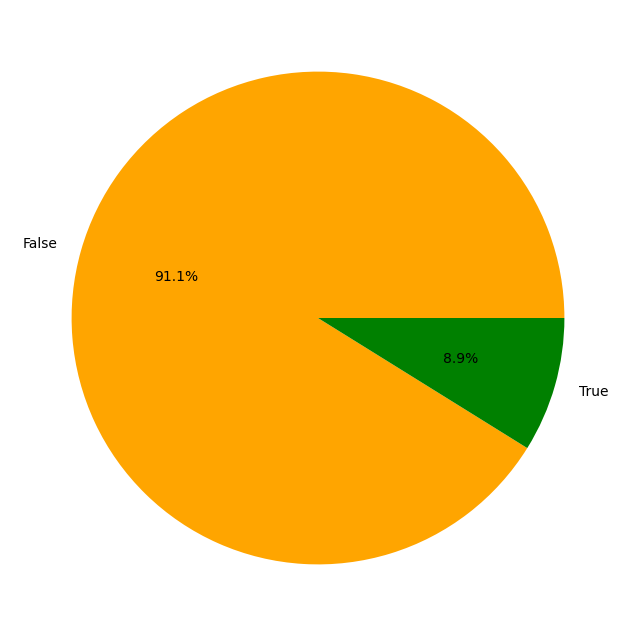

In [31]:
# Generate a pie chart to show distribution of the proportion
plt.figure(figsize=(8, 8))
plt.pie(remote_analysis['proportion'], labels=remote_analysis['job_work_from_home'], autopct='%1.1f%%', colors=['orange', 'green'])
plt.show()

In [32]:
# How does remote work pattern change by the place? Which country have more remote culture? Calculate percentage of remote jobs by country
remote_analysis_by_title = df.groupby('job_title_short')['job_work_from_home'].value_counts(normalize=True).unstack().fillna(0).reset_index()

# Sort by percentage to see which countries have more remote culture
remote_analysis_by_title = remote_analysis_by_title.sort_values(True, ascending=False)
remote_analysis_by_title

job_work_from_home,job_title_short,False,True
7,Senior Data Engineer,0.852815,0.147185
3,Data Engineer,0.886110,0.113890
5,Machine Learning Engineer,0.894318,0.105682
8,Senior Data Scientist,0.897205,0.102795
4,Data Scientist,0.915634,0.084366
6,Senior Data Analyst,0.919770,0.080230
2,Data Analyst,0.932036,0.067964
9,Software Engineer,0.934786,0.065214
0,Business Analyst,0.943155,0.056845
1,Cloud Engineer,0.953694,0.046306


<Axes: xlabel='True', ylabel='job_title_short'>

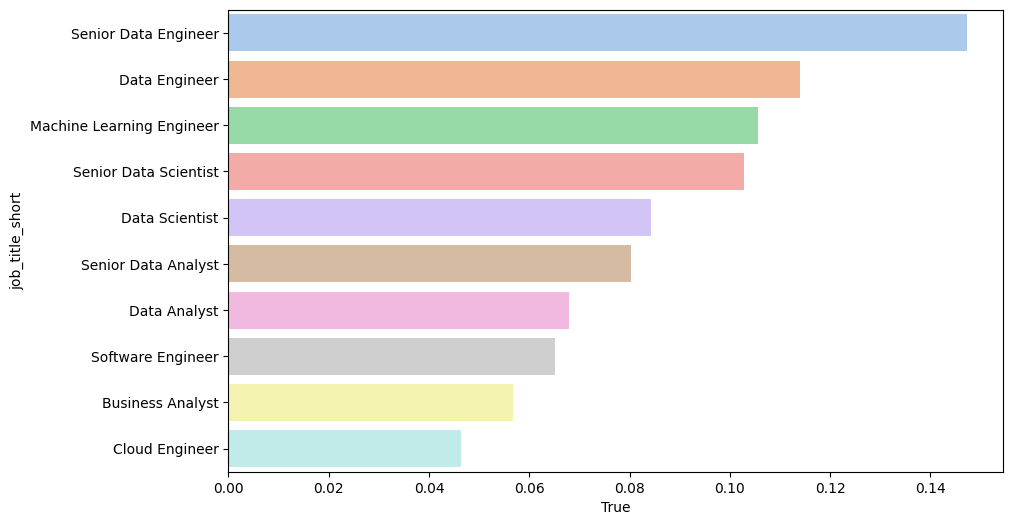

In [33]:
# Generate a graph for above remote_analysis_by_title
plt.figure(figsize=(10, 6))
sns.barplot(x=True, y='job_title_short', hue='job_title_short', data=remote_analysis_by_title, palette='pastel')

## **6.4) Skill Analysis**

In [34]:
# Exploding and count the Top 10 skills across all positions
import ast
def safe_literal_eval(x):
    if isinstance(x, str):
        if x == 'Not specified':
            return []  # Handle 'Not specified' as an empty list
        try:
            return ast.literal_eval(x)
        except (SyntaxError, ValueError):
            return []  # Return empty list for other invalid strings
    return x
df['job_skills'] = df['job_skills'].apply(safe_literal_eval)
df_exploded = df.explode('job_skills')
df_exploded.head()

,job_title_short,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills
0,Senior Data Engineer,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,Boehringer Ingelheim,NaN
1,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,Hewlett Packard Enterprise,r
1,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,Hewlett Packard Enterprise,python
1,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,Hewlett Packard Enterprise,sql
1,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,Hewlett Packard Enterprise,nosql


In [ ]:
df_exploded_to_csv = df_exploded.to_csv('df_exploded.csv', index=False)

In [35]:
job_skills_title = df_exploded.groupby('job_title_short')['job_skills'].apply(list).reset_index()
job_skills_title

,job_title_short,job_skills
0,Business Analyst,"[excel, powerpoint, power bi, r, python, sql, ..."
1,Cloud Engineer,"[javascript, python, gcp, aws, selenium, node,..."
2,Data Analyst,"[r, python, sql, nosql, power bi, tableau, sql..."
3,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
4,Data Scientist,"[sql, python, r, mongodb, mongodb, sql server,..."
5,Machine Learning Engineer,"[python, r, python, sql, pytorch, pandas, pyth..."
6,Senior Data Analyst,"[sql, sql, python, nan, python, excel, sas, sa..."
7,Senior Data Engineer,"[nan, sql, python, java, sql server, gcp, bigq..."
8,Senior Data Scientist,"[excel, nan, python, aws, gcp, python, go, ora..."
9,Software Engineer,"[sql, power bi, bash, python, aws, linux, splu..."


/tmp/ipython-input-36-256850556.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




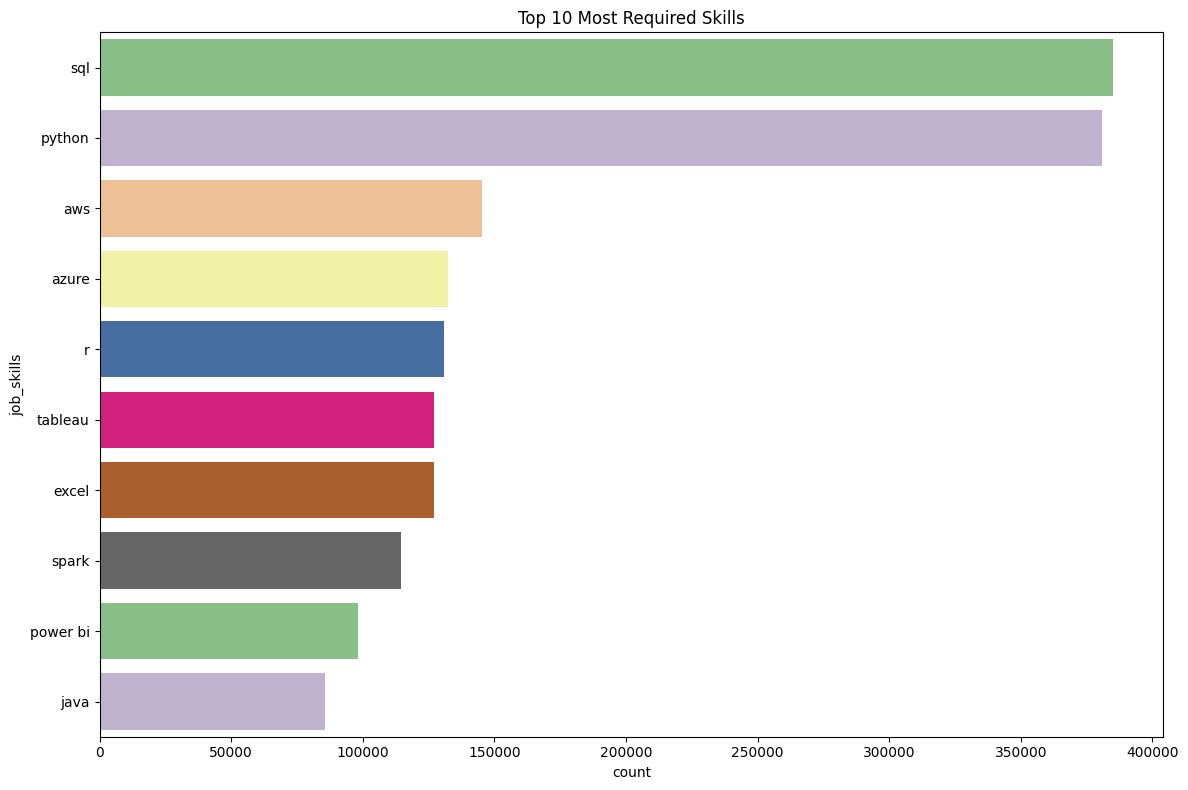

In [36]:
# Create a clean DataFrame for plotting
skill_analysis = df_exploded['job_skills'].value_counts().reset_index()
skill_analysis = skill_analysis.head(10)  # Top 10 skills

# Plot using this simpler DataFrame
plt.figure(figsize=(12, 8))
sns.barplot(data=skill_analysis, x='count', y='job_skills', palette='Accent')
plt.title('Top 10 Most Required Skills')
plt.tight_layout()
plt.show()

## **6.5) Time series Analysis**

In [37]:
# Posting Trends
#Analyze posting frequency by month/quarter
df['month'] = df['job_posted_date'].dt.month
monthly_analysis = df['month'].value_counts().sort_index().reset_index()
monthly_analysis.columns = ['month', 'count']
monthly_analysis

,month,count
0,1,91822
1,2,64578
2,3,64084
3,4,62919
4,5,52104
5,6,61572
6,7,63777
7,8,75162
8,9,62359
9,10,66611


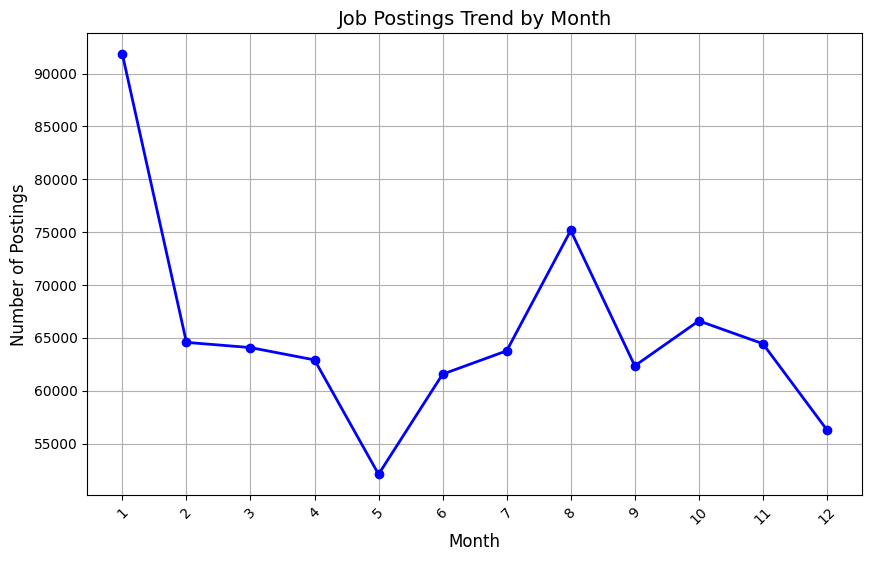

In [38]:
# Plotting a line plot for monthly job postings
plt.figure(figsize=(10, 6))
plt.plot(monthly_analysis['month'], monthly_analysis['count'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.title('Job Postings Trend by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Postings', fontsize=12)
plt.xticks(monthly_analysis['month'], rotation=45)
plt.grid(True)
plt.show()


In [39]:
# Any seasonal change for certain positions?
# Map month numbers to names
df['month'] = pd.to_datetime(df['job_posted_date']).dt.month
month_names = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
               7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['month_name'] = df['month'].map(month_names)

# Group by month name and job title
monthly_analysis_by_title = df.groupby(['month_name', 'job_title_short']).size().reset_index(name='count')
monthly_analysis_by_title

,month_name,job_title_short,count
0,April,Business Analyst,4246
1,April,Cloud Engineer,1051
2,April,Data Analyst,15514
3,April,Data Engineer,14891
4,April,Data Scientist,13513
...,...,...,...
115,September,Machine Learning Engineer,1250
116,September,Senior Data Analyst,2194
117,September,Senior Data Engineer,3547
118,September,Senior Data Scientist,2936


In [40]:
# Percentage of each open positions across the year
monthly_analysis_by_title['percentage'] = (monthly_analysis_by_title['count'] / monthly_analysis_by_title.groupby('month_name')['count'].transform('sum')) * 100
monthly_analysis_by_title

,month_name,job_title_short,count,percentage
0,April,Business Analyst,4246,6.748359
1,April,Cloud Engineer,1051,1.670402
2,April,Data Analyst,15514,24.657099
3,April,Data Engineer,14891,23.666937
4,April,Data Scientist,13513,21.476819
...,...,...,...,...
115,September,Machine Learning Engineer,1250,2.004522
116,September,Senior Data Analyst,2194,3.518337
117,September,Senior Data Engineer,3547,5.688032
118,September,Senior Data Scientist,2936,4.708222


In [41]:
# Identify any patterns in hiring
quarterly_analysis = df['job_posted_date'].dt.quarter.value_counts().sort_index().reset_index()
quarterly_analysis.columns = ['quarter', 'count']
quarterly_analysis

,quarter,count
0,1,220484
1,2,176595
2,3,201298
3,4,187364


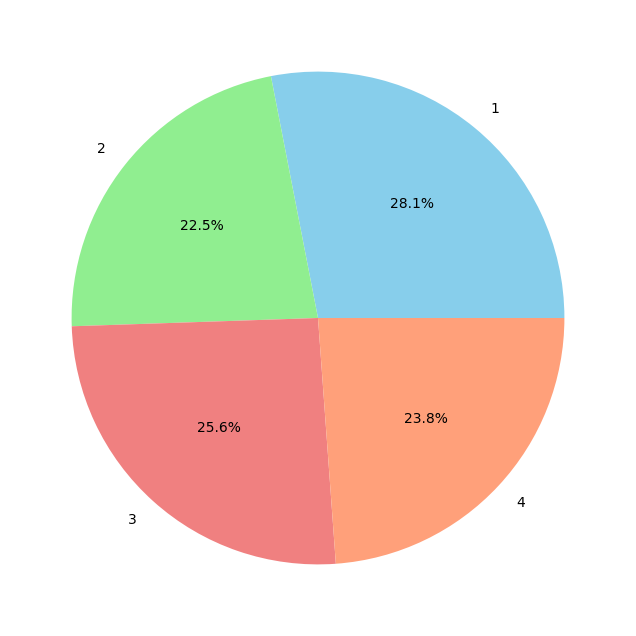

In [42]:
# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(quarterly_analysis['count'], labels=quarterly_analysis['quarter'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.show()

## **6.6) Benefits & Requirement Analysis**

In [43]:
# Calculate percentage of positions mentioning no degree requirements
no_degree_analysis = df['job_no_degree_mention'].value_counts(normalize=True).reset_index()
no_degree_analysis


,job_no_degree_mention,proportion
0,False,0.693568
1,True,0.306432


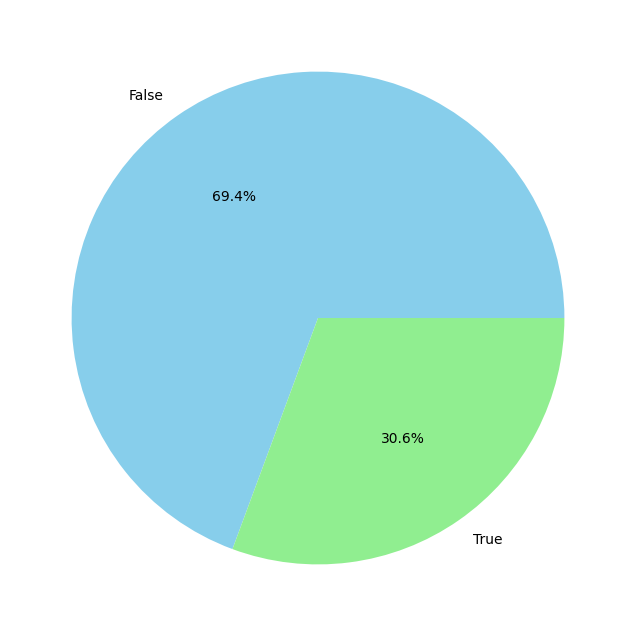

In [44]:
# Generate a graph
plt.figure(figsize=(8, 8))
plt.pie(no_degree_analysis['proportion'], labels=no_degree_analysis['job_no_degree_mention'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.show()

In [45]:
# Compare this across different job titles and locations
no_degree_analysis_by_title = df.groupby('job_title_short')['job_no_degree_mention'].value_counts(normalize=True).unstack().fillna(0).reset_index()
no_degree_analysis_by_title

job_no_degree_mention,job_title_short,False,True
0,Business Analyst,0.736257,0.263743
1,Cloud Engineer,0.521531,0.478469
2,Data Analyst,0.613250,0.386750
3,Data Engineer,0.564929,0.435071
4,Data Scientist,0.939757,0.060243
5,Machine Learning Engineer,0.927983,0.072017
6,Senior Data Analyst,0.637185,0.362815
7,Senior Data Engineer,0.566816,0.433184
8,Senior Data Scientist,0.941824,0.058176
9,Software Engineer,0.518596,0.481404


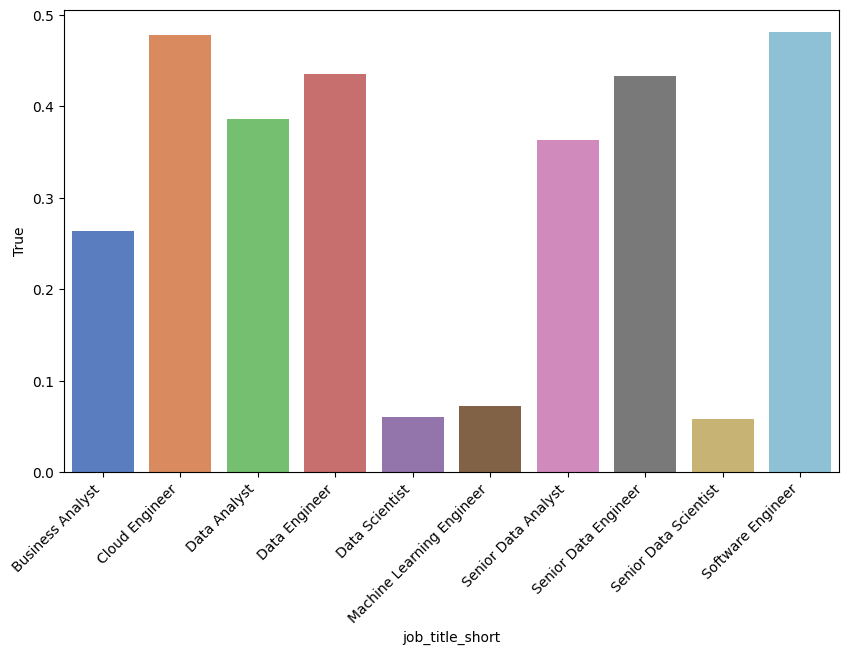

In [46]:
# Generate a graph
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title_short', y=True, hue='job_title_short', data=no_degree_analysis_by_title, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.show()